**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split



**Loading the datsets**

In [3]:
iris_data_sets = datasets.load_iris()

**Looking at the attributes and the targets in the data set**

In [4]:
col_names = iris_data_sets.feature_names
target_names = iris_data_sets.target_names
print("Attributest = "+str(col_names))
print("Target categories = " +str(target_names))

Attributest = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target categories = ['setosa' 'versicolor' 'virginica']


**Plotting our targeted group based on the sepals length and width of sepals**

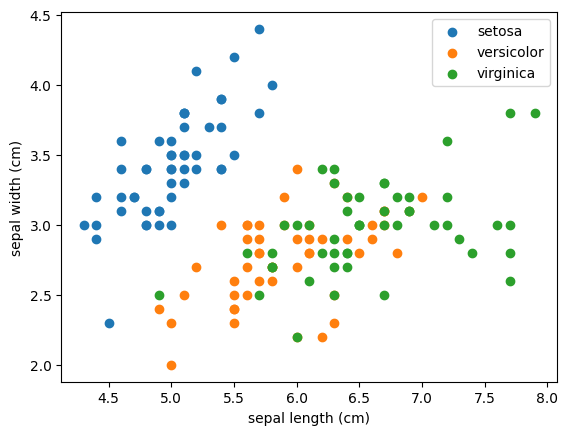

In [5]:
plt.scatter(np.array(iris_data_sets.data[0:50,0]),np.array(iris_data_sets.data[0:50,1]),label='setosa')
plt.scatter(np.array(iris_data_sets.data[50:100,0]),np.array(iris_data_sets.data[50:100,1]),label='versicolor')
plt.scatter(np.array(iris_data_sets.data[100:150,0]),np.array(iris_data_sets.data[100:150,1]),label='virginica')
plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

**Splitting the data set into training and test data set**

In [6]:
x = iris_data_sets.data[:,:2]
y = iris_data_sets.target[:]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state = 0)


**Importing KNN Classifier**

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import math

In [8]:
range_k = math.floor(math.sqrt(len(y_train)))
if range_k %2 == 0 :
  range_k += 1

**Training our model on different K values**

In [9]:
train_accuracy = []
test_accuracy = []
for i in range(0,range_k) :
  knn = KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(x_train,y_train)
  train_accuracy.append(knn.score(x_train,y_train))
  test_accuracy.append(knn.score(x_test,y_test))


**Plotting the accuracy of the model on training and test datas sets with respect to various k values**

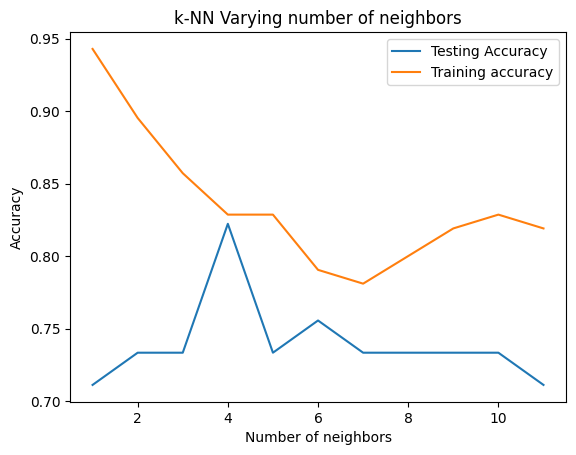

In [10]:
plt.title('k-NN Varying number of neighbors')
plt.plot(list(range(1,range_k+1)), test_accuracy, label='Testing Accuracy')
plt.plot(list(range(1,range_k+1)), train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [11]:
for i in range(len(train_accuracy)) :
  print("k = "+str(i+1) + ", " + "train_accuracy = "+str(train_accuracy[i]) + ", " + "test_accuracy = "+str(test_accuracy[i]))

k = 1, train_accuracy = 0.9428571428571428, test_accuracy = 0.7111111111111111
k = 2, train_accuracy = 0.8952380952380953, test_accuracy = 0.7333333333333333
k = 3, train_accuracy = 0.8571428571428571, test_accuracy = 0.7333333333333333
k = 4, train_accuracy = 0.8285714285714286, test_accuracy = 0.8222222222222222
k = 5, train_accuracy = 0.8285714285714286, test_accuracy = 0.7333333333333333
k = 6, train_accuracy = 0.7904761904761904, test_accuracy = 0.7555555555555555
k = 7, train_accuracy = 0.780952380952381, test_accuracy = 0.7333333333333333
k = 8, train_accuracy = 0.8, test_accuracy = 0.7333333333333333
k = 9, train_accuracy = 0.819047619047619, test_accuracy = 0.7333333333333333
k = 10, train_accuracy = 0.8285714285714286, test_accuracy = 0.7333333333333333
k = 11, train_accuracy = 0.819047619047619, test_accuracy = 0.7111111111111111


We can see that our model is showing maximum accuracy at k = 4 on the test data set

In [12]:
knn_final = KNeighborsClassifier(n_neighbors=4)
knn_final.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [13]:
knn_final.score(x_test,y_test)

0.8222222222222222

**Confusion Matrix**

>Confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.



In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
y_predict = knn_final.predict(x_test)

In [16]:
confusion_matrix(y_test,y_predict)

array([[16,  0,  0],
       [ 0, 14,  4],
       [ 0,  4,  7]])

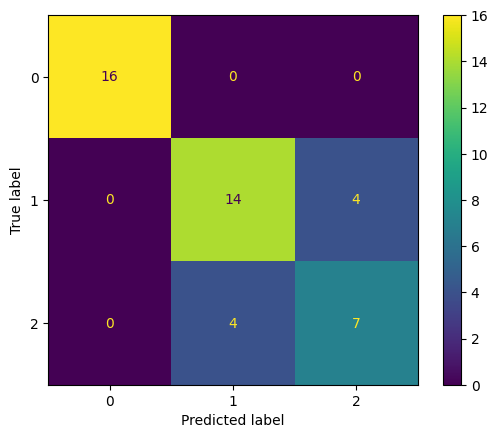

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
    knn_final,x_test, y_test)
plt.show()

In [18]:
pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,16,0,0,16
1,0,14,4,18
2,0,4,7,11
All,16,18,11,45


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.78      0.78      0.78        18
           2       0.64      0.64      0.64        11

    accuracy                           0.82        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.82      0.82      0.82        45

